<a href="https://colab.research.google.com/github/Bayhaqieee/GDG_ML_Learning/blob/main/Handson_DigitClassifier_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digit Classifier using Dense Neural Network
- Author: Muhammad Aditya Bayhaqie, Eva Theresia Pardede , Rihan Naufaldihanif
- Session: Building Neural Network using MNIST

## Problem Definition

In this session, we aim to build a simple image classifier using a dense neural network (MLP) to recognize handwritten digits (0-9) from the MNIST dataset.

Why choose this Dataset and Algorithm?
- It’s a classic starter problem for deep learning.
- Easy to visualize and evaluate.
- Teaches foundational skills like preprocessing, model design, and evaluation.

## Data Collection

### Data Collection

We use the MNIST dataset, available directly from Keras.

In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Training shape: {x_train.shape}, Test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (60000, 28, 28), Test shape: (10000, 28, 28)


## Data Preprocessing

### Data Preprocessing

Steps:
- Normalize pixel values
- Flatten 28x28 images into 784 vectors
- One-hot encode the labels

In [2]:
from tensorflow.keras.utils import to_categorical
import numpy as np

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

## Model Building

We use a simple MLP with:
- Input: 784
- Hidden: 128 (ReLU)
- Output: 10 (Softmax)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training & Evaluation

Let's train for 10 epochs with validation split.

In [4]:
history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    validation_split=0.2,
                    batch_size=32)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8625 - loss: 0.4823 - val_accuracy: 0.9530 - val_loss: 0.1657
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9581 - loss: 0.1410 - val_accuracy: 0.9636 - val_loss: 0.1219
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9735 - loss: 0.0919 - val_accuracy: 0.9703 - val_loss: 0.1041
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9809 - loss: 0.0653 - val_accuracy: 0.9703 - val_loss: 0.0975
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9856 - loss: 0.0494 - val_accuracy: 0.9739 - val_loss: 0.0860
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9893 - loss: 0.0364 - val_accuracy: 0.9732 - val_loss: 0.0938
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9916 - loss: 0.0296 - val_accuracy: 0.9762 - val_loss: 0.0867
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9926 - loss: 0.0241 

## Visualization

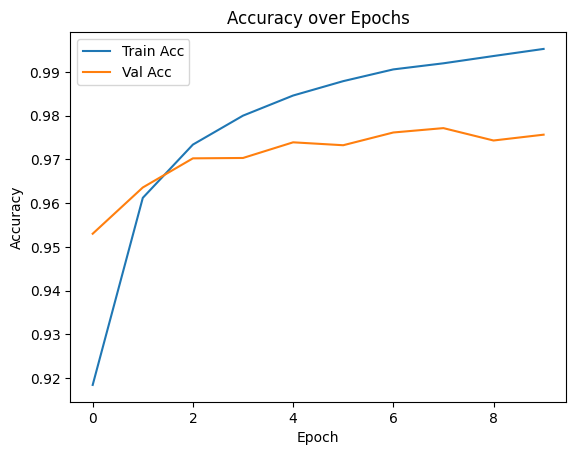

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model Deployment

In [6]:
# model.save('mnist_dense_model.h5')